In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [3]:
import keras

In [1]:
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
X_train = np.load('/content/drive/MyDrive/Colab Notebooks/DL/6.optimization_and_yperparameters/goalkeeper/data/data_X.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/DL/6.optimization_and_yperparameters/goalkeeper/data/data_y.npy')
X_valid = np.load('/content/drive/MyDrive/Colab Notebooks/DL/6.optimization_and_yperparameters/goalkeeper/data/data_Xval.npy')
y_valid = np.load('/content/drive/MyDrive/Colab Notebooks/DL/6.optimization_and_yperparameters/goalkeeper/data/data_yval.npy')

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(211, 2) (211, 1) (200, 2) (200, 1)


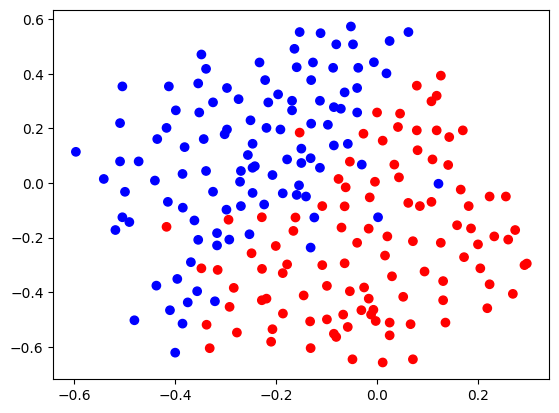

In [7]:
# visualizing the data with colors based on labels
import matplotlib.pyplot as plt

colors = ['red' if label == 0 else 'blue' for label in y_train.ravel()]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors)

## Modeling without regularization

In [8]:
# defining a deep neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [9]:
# compiling the model
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# training the model
history = model.fit(X_train, y_train,
                    epochs=500, batch_size=32,
                    validation_data=(X_valid, y_valid))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.7960 - loss: 0.5532 - val_accuracy: 0.8650 - val_loss: 0.3893
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9050 - loss: 0.2476 - val_accuracy: 0.9150 - val_loss: 0.2799
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8962 - loss: 0.2375 - val_accuracy: 0.9200 - val_loss: 0.2759
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9236 - loss: 0.2321 - val_accuracy: 0.9300 - val_loss: 0.3005
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9302 - loss: 0.2744 - val_accuracy: 0.9200 - val_loss: 0.3377
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9391 - loss: 0.2260 - val_accuracy: 0.9250 - val_loss: 0.2802
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9195 - loss: 0.2359 - val_accuracy: 0.9200 - val_loss: 0.3810
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9374 - loss: 0.1990 - val_accuracy: 0.9300 - val_loss

In [11]:
# plotting training and validation loss and accuracy
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss) + 1)

    fig, axs = plt.subplots(2, figsize=(10, 7))
    fig.suptitle('Training and Validation Metrics')

    # Loss plot
    axs[0].plot(epochs, train_loss, label='Training loss', c='red')
    axs[0].plot(epochs, val_loss, label='Validation loss', c='blue')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].set_ylim([0, 1.5])

    # Accuracy plot
    axs[1].plot(epochs, train_acc, label='Training accuracy', c='red')
    axs[1].plot(epochs, val_acc, label='Validation accuracy', c='blue')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.subplots_adjust(hspace=0.5)
    plt.show()

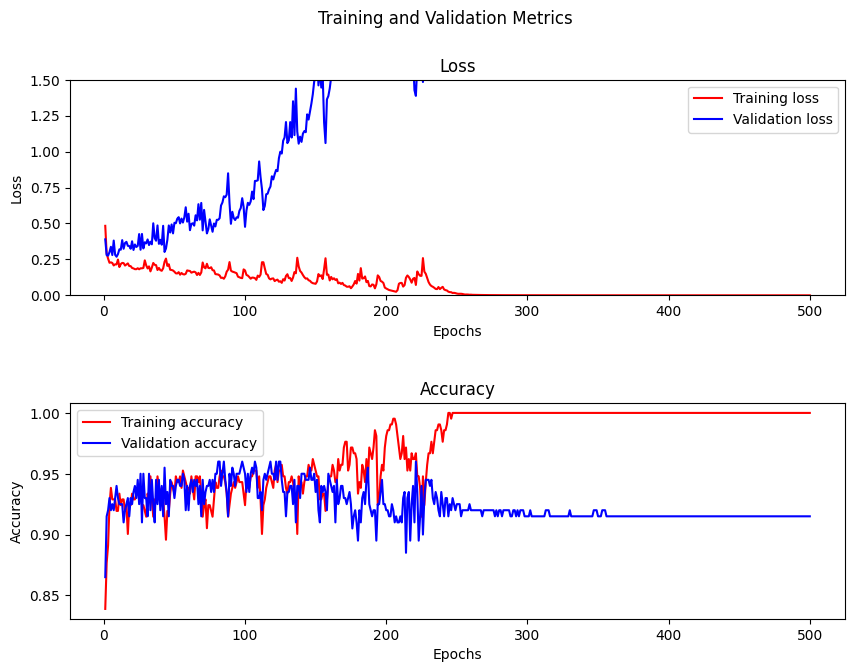

In [12]:
plot_loss_acc(history)

In [13]:
# plotting decision boundaries for the model
from sklearn.inspection import DecisionBoundaryDisplay

def get_decision_boundaries(model, xmin, xmax, ymin, ymax, steps):
  x_span = np.linspace(xmin, xmax, steps)
  y_span = np.linspace(ymin, ymax, steps)
  xx, yy = np.meshgrid(x_span, y_span)
  points = (np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32))

  z = (model.predict(np.c_[xx.ravel(), yy.ravel()])>0.5).reshape(xx.shape)

  return xx, yy, z

def plt_decision_boundaries(model, x_min, x_max, y_min, y_max, steps):
  plt.figure(figsize=(6, 4))
  xx, yy, z = get_decision_boundaries(model, x_min, x_max, y_min, y_max, steps)
  plt.contourf(xx, yy, z, alpha=0.2, cmap=matplotlib.colors.ListedColormap(["C1", "C0"]));

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


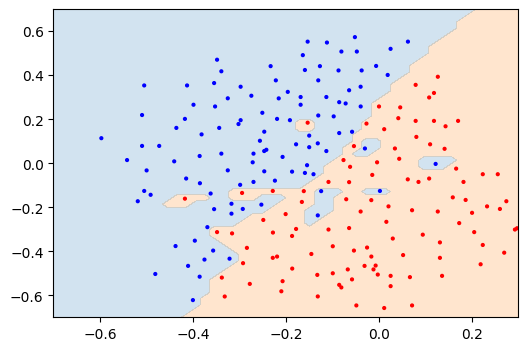

In [15]:
# plotting decision boundaries and training data points
import matplotlib
plt_decision_boundaries(model, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in y_train.ravel()]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, s=4)
plt.show()

## Regularization: Dropout method

In [16]:
# defining a deep neural network model with dropout layers
model_dropout = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(1, activation='sigmoid')])

In [17]:
# compiling the model
model_dropout.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
# training the model
history = model_dropout.fit(X_train, y_train,
                            epochs=500, batch_size=32,
                            validation_data=(X_valid, y_valid))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 589ms/step - accuracy: 0.7271 - loss: 0.5664 - val_accuracy: 0.9150 - val_loss: 0.3821
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8587 - loss: 0.3750 - val_accuracy: 0.9200 - val_loss: 0.3618
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9286 - loss: 0.2091 - val_accuracy: 0.9150 - val_loss: 0.3594
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8645 - loss: 0.2997 - val_accuracy: 0.9000 - val_loss: 0.3090
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8896 - loss: 0.2384 - val_accuracy: 0.9250 - val_loss: 0.2899
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8981 - loss: 0.2396 - val_accuracy: 0.9050 - val_loss: 0.3824
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8683 - loss: 0.3161 - val_accuracy: 0.9250 - val_loss: 0.3121
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8959 - loss: 0.2781 - val_accuracy: 0.8750 - val_loss

In [19]:
# retrieving loss and accuracy for training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

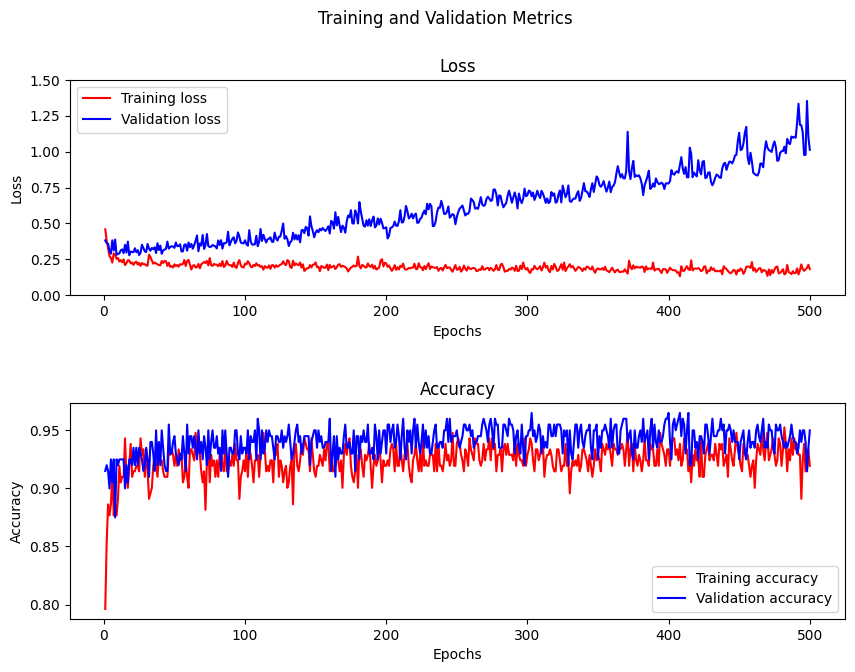

In [20]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


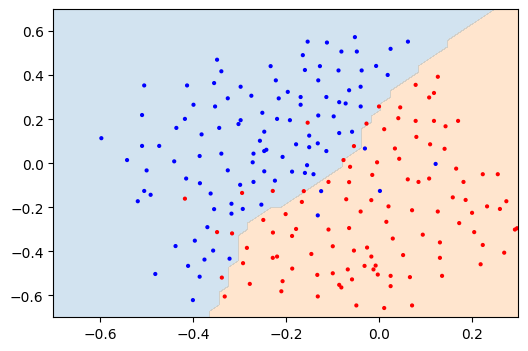

In [21]:
# plotting decision boundaries and training data points
plt_decision_boundaries(model_dropout, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in y_train.ravel()]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, s=4)
plt.show()

## Regularization: L1L2 method

In [22]:
# defining a model with L1L2 regularization
model_l1l2 = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l1=3e-5, l2=3e-4)),
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l1=3e-5, l2=3e-4)),
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l1=3e-5, l2=3e-4)),
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.L1L2(l1=3e-5, l2=3e-4))
    ])

In [23]:
# compiling the model
model_l1l2.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
# training the model
history = model_l1l2.fit(X_train, y_train,
                         epochs=500, batch_size=32,
                         validation_data=(X_valid, y_valid))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 564ms/step - accuracy: 0.5949 - loss: 19.4659 - val_accuracy: 0.8800 - val_loss: 11.9065
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8514 - loss: 10.2620 - val_accuracy: 0.8850 - val_loss: 5.7555
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8990 - loss: 4.8915 - val_accuracy: 0.9000 - val_loss: 2.7620
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9157 - loss: 2.4737 - val_accuracy: 0.9350 - val_loss: 2.1743
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9255 - loss: 2.0236 - val_accuracy: 0.9150 - val_loss: 1.4771
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9353 - loss: 1.3284 - val_accuracy: 0.9300 - val_loss: 1.0471
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9310 - loss: 0.9916 - val_accuracy: 0.9300 - val_loss: 0.8012
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9079 - loss: 0.7850 - val_accuracy: 0.9350 - val_l

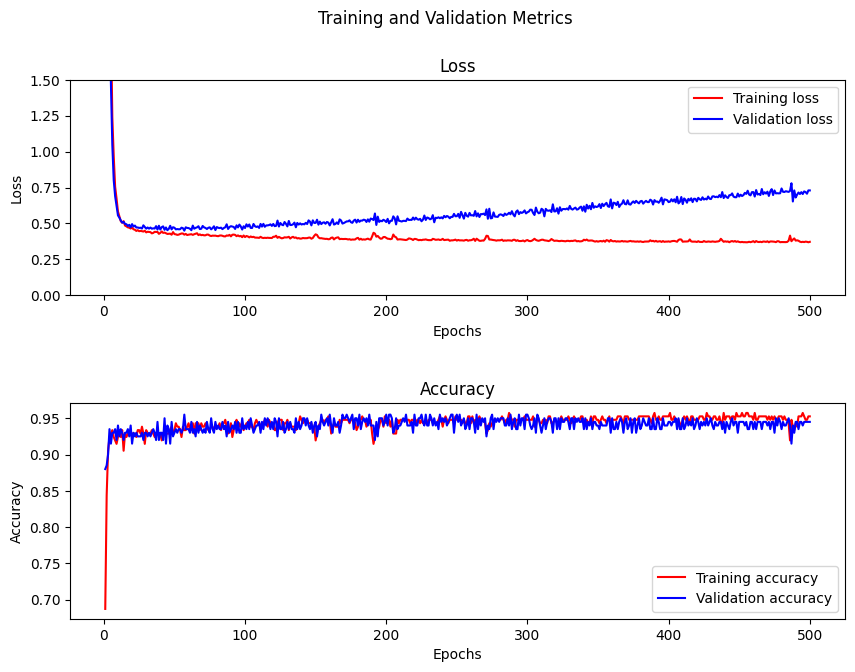

In [25]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


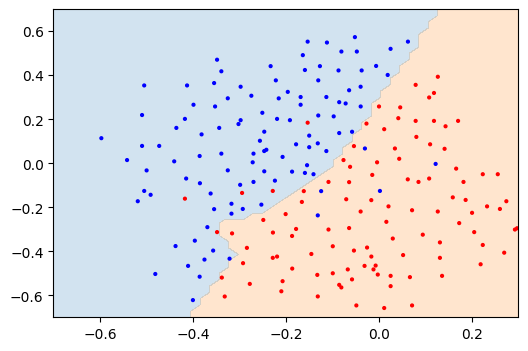

In [26]:
# plotting decision boundaries and training data
plt_decision_boundaries(model_l1l2, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in y_train.ravel()]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, s=4)
plt.show()